# Import Library and Read all .csv file 

In [1]:
#Read and save all CSV file
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
data_2010 = pd.read_csv(r'2010.csv')
data_2011 = pd.read_csv(r'2011.csv')
data_2012 = pd.read_csv(r'2012.csv')
data_2013 = pd.read_csv(r'2013.csv')
data_2014 = pd.read_csv(r'2014.csv')
data_2015 = pd.read_csv(r'2015.csv')
data_2016 = pd.read_csv(r'2016.csv')
data_2017 = pd.read_csv(r'2017.csv')
data_2018 = pd.read_csv(r'2018.csv')
data_2019 = pd.read_csv(r'2019.csv')


# Combine all data into 1 dataframe

top_spotify_songs = pd.concat([data_2010,data_2011,data_2012,data_2013,data_2014,data_2015,
                               data_2016,data_2017,data_2018,data_2019])

# Change column name
top_spotify_songs.rename(columns= {'Unnamed: 0':'Id'}, inplace = True)
top_spotify_songs

,Id,title,artist,top genre,year,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,pop
0,1,"Hey, Soul Sister",Train,neo mellow,2010,97,89,67,-4,8,80,217,19,4,83
1,2,Love The Way You Lie,Eminem,detroit hip hop,2010,87,93,75,-5,52,64,263,24,23,82
2,3,TiK ToK,Kesha,dance pop,2010,120,84,76,-3,29,71,200,10,14,80
3,4,Bad Romance,Lady Gaga,dance pop,2010,119,92,70,-4,8,71,295,0,4,79
4,5,Just the Way You Are,Bruno Mars,pop,2010,109,84,64,-5,9,43,221,2,4,78
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26,599,Find U Again (feat. Camila Cabello),Mark Ronson,dance pop,2019,104,66,61,-7,20,16,176,1,3,75
27,600,Cross Me (feat. Chance the Rapper & PnB Rock),Ed Sheeran,pop,2019,95,79,75,-6,7,61,206,21,12,75
28,601,"No Brainer (feat. Justin Bieber, Chance the Ra...",DJ Khaled,dance pop,2019,136,76,53,-5,9,65,260,7,34,70
29,602,Nothing Breaks Like a Heart (feat. Miley Cyrus),Mark Ronson,dance pop,2019,114,79,60,-6,42,24,217,1,7,69


In [2]:
# Create a file top_spotify_songs.csv
top_spotify_songs.to_csv('top_spotify_songs.csv',index = True)

# Data Exploratory


In [3]:
# Check Data Type
top_spotify_songs.dtypes

Id            int64
title        object
artist       object
top genre    object
year          int64
bpm           int64
nrgy          int64
dnce          int64
dB            int64
live          int64
val           int64
dur           int64
acous         int64
spch          int64
pop           int64
dtype: object

#### 1. Most popular song in the dataset

In [4]:
most_popular = top_spotify_songs.sort_values(by = ['pop'], ascending= False)
most_popular.head(1)


,Id,title,artist,top genre,year,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,pop
0,573,Memories,Maroon 5,pop,2019,91,32,76,-7,8,57,189,84,5,99


#### 2. Who has the most song recorded in the dataset?

In [33]:
most_songs_artist = top_spotify_songs.groupby('artist').size()
most_song_artist = most_songs_artist.idxmax()
print('Artist has the highest number of song recorded is '+ most_song_artist)

Artist has the highest number of song recorded is Katy Perry


#### 3. Top 10 artists has the most song

In [7]:
most_artist = most_songs_artist.sort_values(ascending= False).head(10)
most_artist

artist
Katy Perry          17
Justin Bieber       16
Maroon 5            15
Rihanna             15
Lady Gaga           14
Bruno Mars          13
Shawn Mendes        11
Ed Sheeran          11
Pitbull             11
The Chainsmokers    11
dtype: int64

#### 4. Visualise top 10 artist with the most song

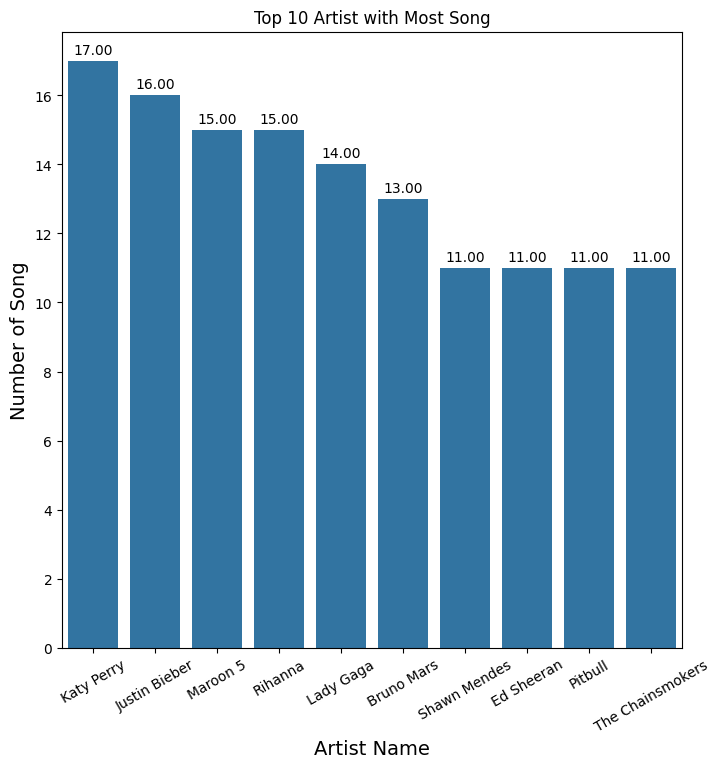

In [8]:
most_artist = most_songs_artist.sort_values(ascending= False).head(10)
plt.figure(figsize=(8,8))

# Define data for visualisation
plots = sb.barplot(data = most_artist)

for bar in plots.patches:
    plots.annotate(format(bar.get_height(), '.2f'),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=10, xytext=(0, 8),
                   textcoords='offset points')

plt.xlabel('Artist Name', size = 14)
plt.xticks(rotation = 30)
plt.ylabel('Number of Song', size = 14)
plt.title('Top 10 Artist with Most Song')
plt.show()


#### 5. What is the most popular genre?

In [9]:
Top_genre = top_spotify_songs.groupby('top genre').count().sort_values(by='Id', ascending= False)
Top_genre.Id.max()

list_top_genre = Top_genre[Top_genre.Id == Top_genre.Id.max()]
print('The most popular genre is ' + list_top_genre.index[0])

The most popular genre is dance pop


#### 6. Visualise top 10 popular genre.

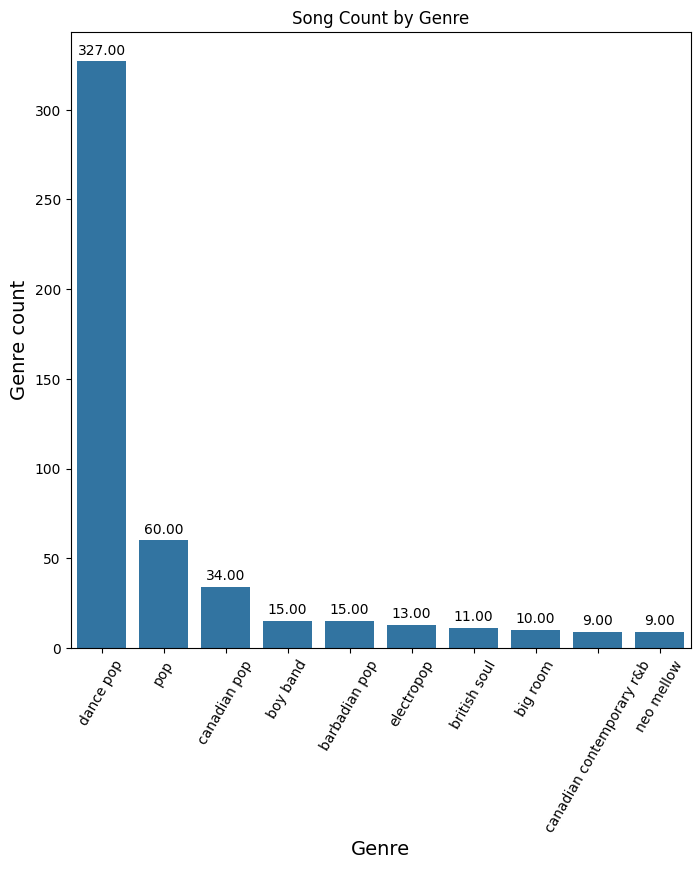

In [32]:
top_10_genre = Top_genre['Id'].head(10)
top_10_genre = top_10_genre.reset_index()
plt.figure(figsize= (8,8))

plots = sb.barplot(x = 'top genre', y= 'Id', data =top_10_genre)
for bar in plots.patches:
    plots.annotate(format(bar.get_height(), '.2f'),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=10, xytext=(0, 8),
                   textcoords='offset points')
    
plt.xlabel('Genre', size = 14)
plt.xticks(rotation = 60)
plt.ylabel('Genre count', size = 14)
plt.title('Song Count by Genre')
plt.show()

#### 7. What is the relationship between song danceability and popularity?

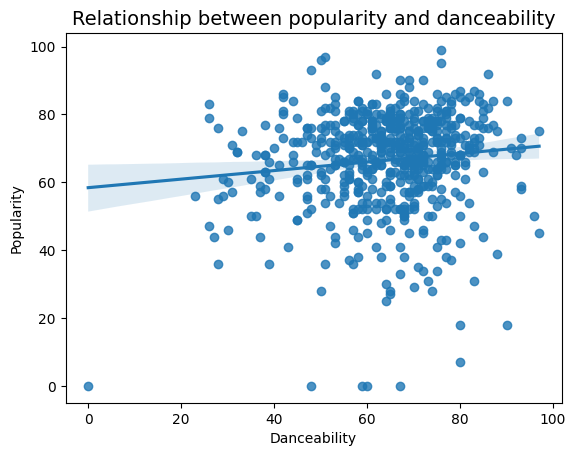

In [11]:
sb.regplot(data = top_spotify_songs, x='dnce', y='pop')
plt.title('Relationship between popularity and danceability', fontsize = 14)
plt.xlabel('Danceability')
plt.ylabel('Popularity')
plt.show()

<br> There is no relationship between Danceability and Popularity

#### 8. What is the relationship between BPM and energy score?

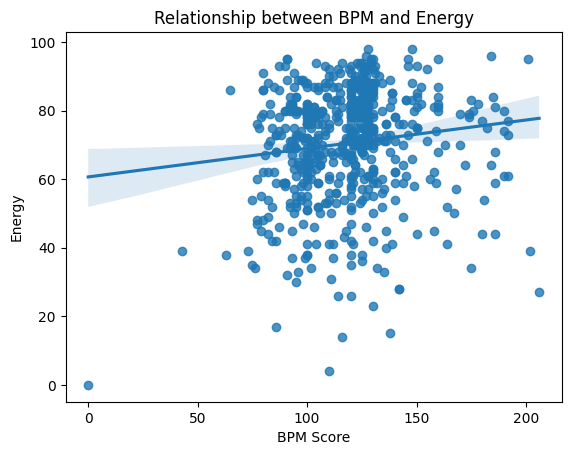

In [12]:
# Does higher bpm lead to higher energy score?
sb.regplot(data = top_spotify_songs, x = 'bpm', y='nrgy')
plt.xlabel('BPM Score')
plt.ylabel('Energy')
plt.title('Relationship between BPM and Energy')
plt.show()

<br> There is also no relationship between BPM and song energy score based on the scatter plot above

#### 9. What genre has the highest average energy score?

In [25]:
# Which genre has the highest average energy score?
energy_each_genre = top_spotify_songs.groupby('top genre').sum().nrgy
song_each_genre = top_spotify_songs.groupby('top genre').Id.count()
average_energy = round(energy_each_genre/song_each_genre)
print('Top genre has the highest average energy score is '+ average_energy.idxmax())

Top genre has the highest average energy score is french indie pop


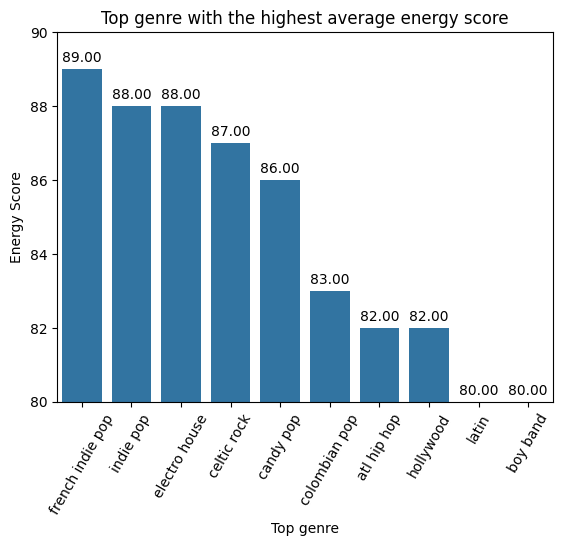

In [31]:
# Visualisation
plots = sb.barplot(data = average_energy.sort_values(ascending= False).head(10))
for bar in plots.patches:
    plots.annotate(format(bar.get_height(), '.2f'),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=10, xytext=(0, 8),
                   textcoords='offset points')
plt.xlabel('Top genre')
plt.xticks(rotation = 60)
plt.ylabel('Energy Score')
plt.title('Top genre with the highest average energy score')
plt.ylim(80,90)
plt.show()